In [1]:
pip install pyspark

In [2]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("PySpark_Tutorial").getOrCreate())

In [3]:
spark

In [4]:
data1 = spark.read.csv("/content/Employe_Performance_dataset.csv", header=True, inferSchema=True)
data1.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  1|      Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|             NULL|         1|Inactive|   New York|Morning|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|
|  5|      Amber Harris| 35| Other|        IT|  4317|  2020-02-15|              5.0|        16|Inactive|   New York|Evening|


In [5]:
from pyspark.sql.functions import *
mode_data = data1.select(mode("Performance Score")).collect()[0][0]
data1 = data1.fillna({"Performance Score": mode_data})
data1.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  1|      Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|
|  5|      Amber Harris| 35| Other|        IT|  4317|  2020-02-15|              5.0|        16|Inactive|   New York|Evening|


In [6]:
mrng_pl = data1.filter(data1["Session"] == "Morning")
mrng_pl.show()
unique_values = mrng_pl.select("Department").distinct()
unique_values.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|
| 10|    Brian Faulkner| 30|  Male|        IT|  8202|  2018-05-26|              1.0|         9|  Active|Los Angeles|Morning|
| 16|       Gary Cooley| 62|  Male|        HR|  5386|  2017-07-25|              2.0|         2|Inactive|    Chicago|Morning|
| 18|Jacqueline Randall| 31|Female|        HR|  3519|  2018-05-18|              4.0|         6|  Active|   New York|Morning|
| 25|     Tracy Carlson| 21|  Male|        HR|  9275|  2022-04-09|              4.0|        12|  Active|   New York|Morning|


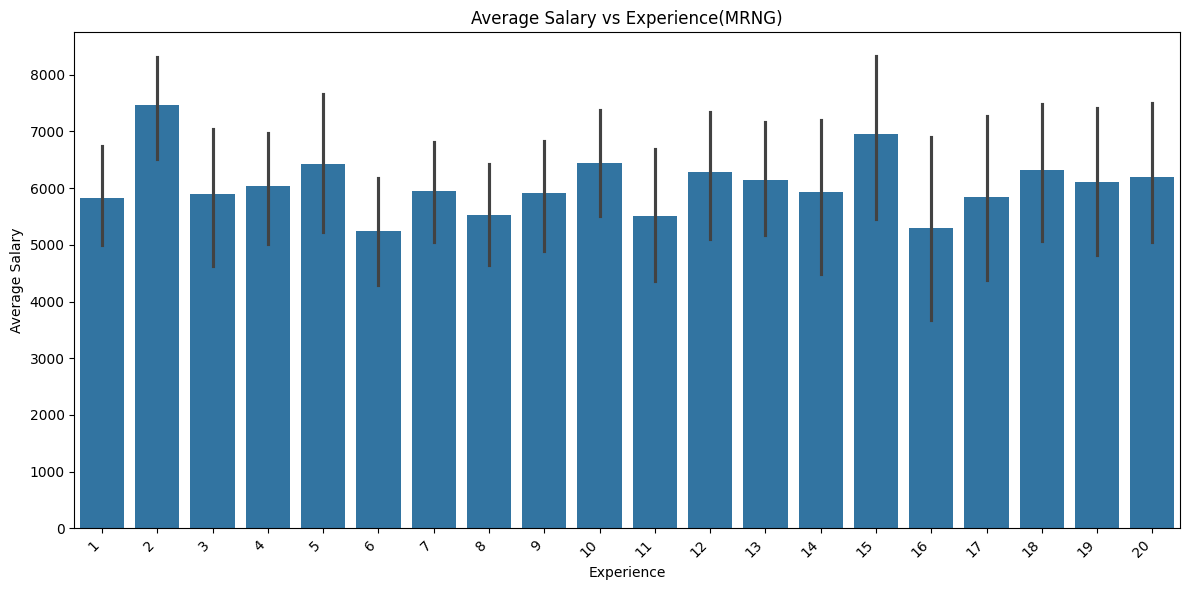

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mrng_pl_pd = mrng_pl.select("Salary", "Experience").toPandas()

# Generate Bar Plot: Create a bar plot using a suitable plotting library (like Matplotlib or Seaborn) to visualize the average salary for each experience level.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=mrng_pl_pd, x='Experience', y='Salary')
plt.title('Average Salary vs Experience(MRNG)')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display Plot: Show the generated plot.
plt.show()

+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|                Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  3|        Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|
| 32|   Jacqueline Becker| 63| Other|     Sales|  4270|  2021-12-16|              2.0|        20|Inactive|Los Angeles|Morning|
| 49|          Jamie Wood| 46|  Male|     Sales|  2773|  2023-02-25|              4.0|         9|  Active|   New York|Morning|
| 51|       Jamie Gregory| 27| Other|     Sales|  3253|  2015-12-07|              2.0|        12|  Active|    Chicago|Morning|
| 53|       Steve Salinas| 42| Other|     Sales|  6567|  2022-03-26|              2.0|        19|Inactive|Los A

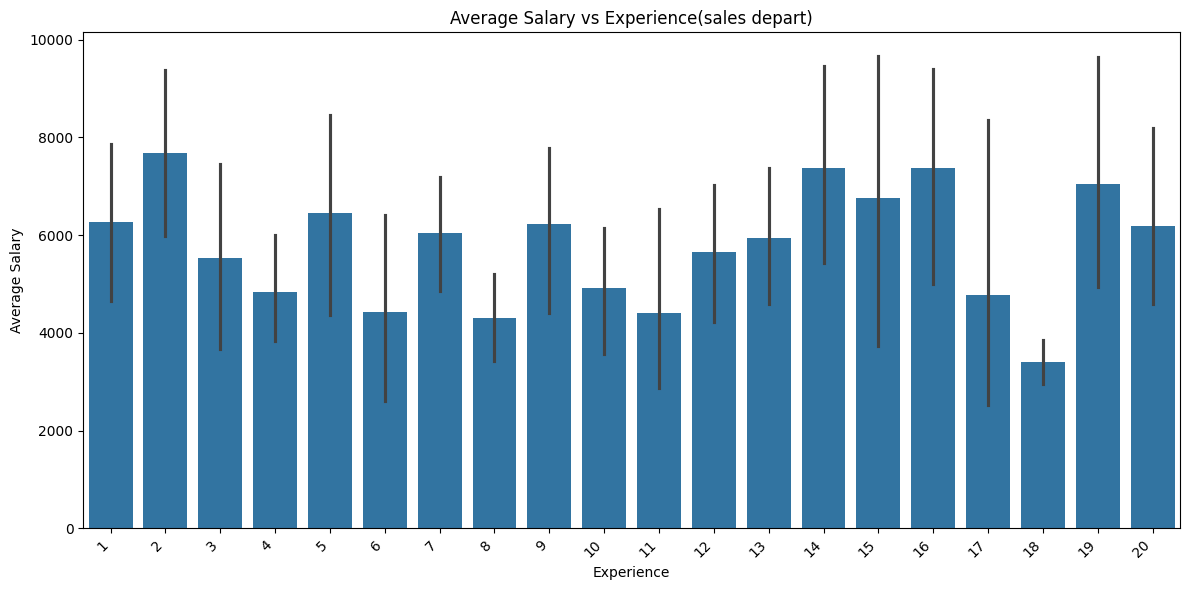

In [8]:
mrng_pl_sales = mrng_pl.filter(mrng_pl["Department"] == "Sales")
mrng_pl_sales.show()

mrng_pl_sales_pd = mrng_pl_sales.select("Salary", "Experience").toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=mrng_pl_sales_pd, x='Experience', y='Salary')
plt.title('Average Salary vs Experience(sales depart)')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|               Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| 16|        Gary Cooley| 62|  Male|        HR|  5386|  2017-07-25|              2.0|         2|Inactive|    Chicago|Morning|
| 18| Jacqueline Randall| 31|Female|        HR|  3519|  2018-05-18|              4.0|         6|  Active|   New York|Morning|
| 25|      Tracy Carlson| 21|  Male|        HR|  9275|  2022-04-09|              4.0|        12|  Active|   New York|Morning|
| 28|      Jordan Warren| 55|Female|        HR|  4608|  2018-07-07|              2.0|        18|Inactive|Los Angeles|Morning|
| 47|       Alicia Scott| 47|Female|        HR|  7966|  2019-09-03|              2.0|         8|Inactive|   New York|M

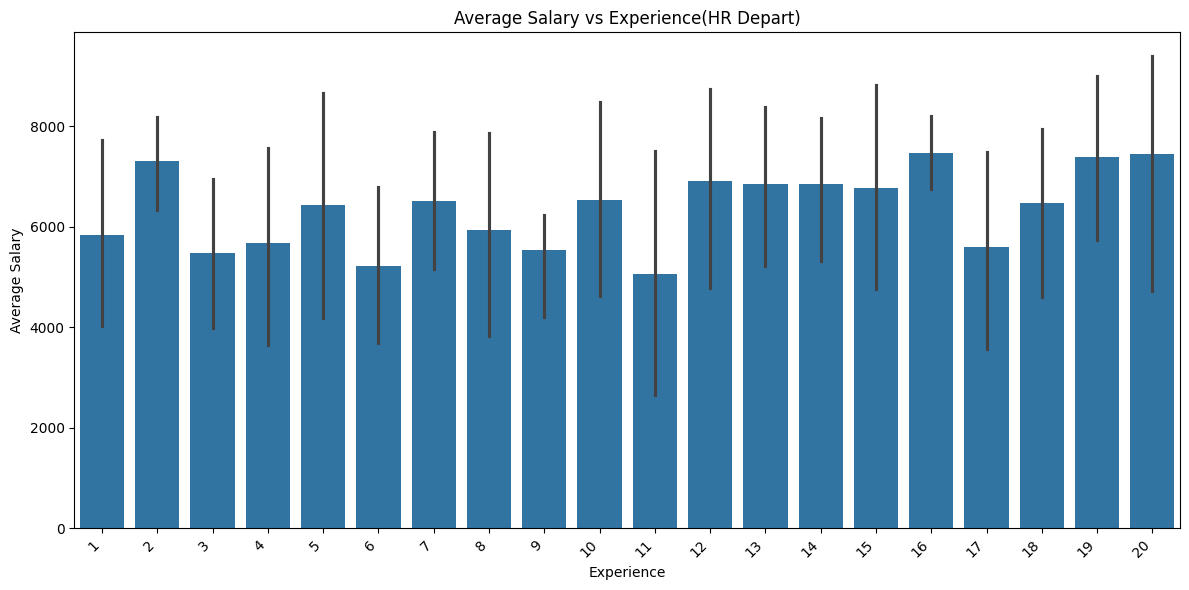

In [9]:
mrng_pl_HR = mrng_pl.filter(mrng_pl["Department"] == "HR")
mrng_pl_HR.show()
mrng_pl_HR_pd = mrng_pl_HR.select("Salary", "Experience").toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=mrng_pl_HR_pd, x='Experience', y='Salary')
plt.title('Average Salary vs Experience(HR Depart)')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

+---+-----------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|             Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+-----------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| 10|   Brian Faulkner| 30|  Male|        IT|  8202|  2018-05-26|              1.0|         9|  Active|Los Angeles|Morning|
| 29|  Vickie Campbell| 65|Female|        IT|  9190|  2019-10-28|              2.0|        12|Inactive|    Chicago|Morning|
| 42|   Charles Mccall| 58| Other|        IT|  9512|  2024-11-10|              2.0|         8|Inactive|Los Angeles|Morning|
| 45|   Daniel Aguirre| 20| Other|        IT|  4184|  2017-10-03|              2.0|        13|  Active|   New York|Morning|
| 70|      Erica James| 64|Female|        IT|  2442|  2020-09-28|              2.0|        14|Inactive|Los Angeles|Morning|
| 76|   

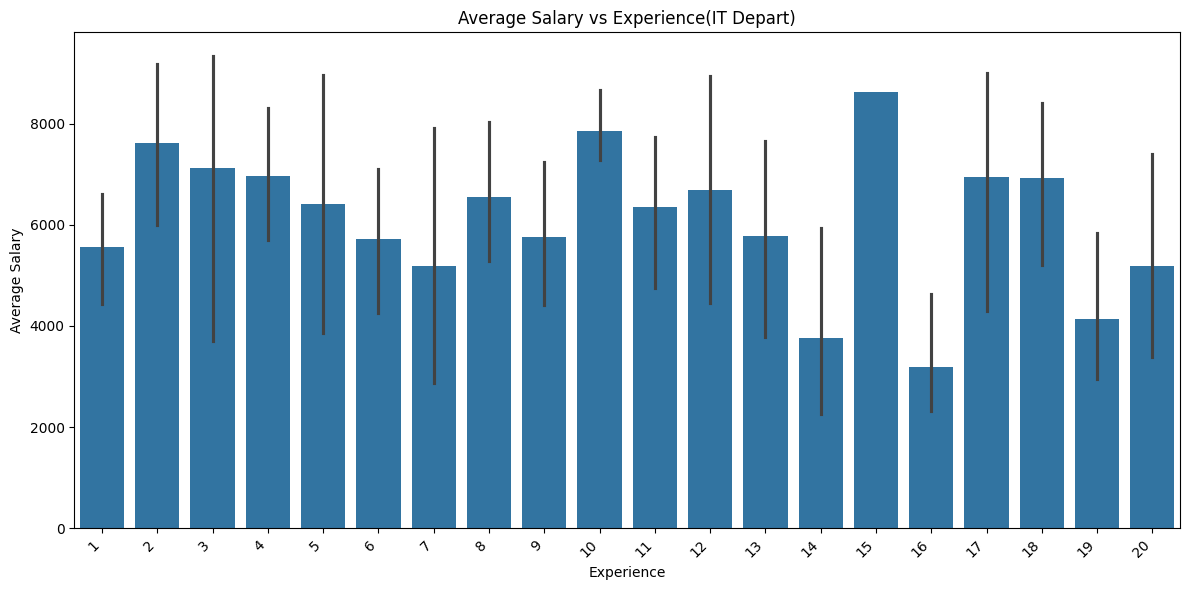

In [10]:
mrng_pl_IT = mrng_pl.filter(mrng_pl["Department"] == "IT")
mrng_pl_IT.show()
mrng_pl_IT_pd = mrng_pl_IT.select("Salary", "Experience").toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=mrng_pl_IT_pd, x='Experience', y='Salary')
plt.title('Average Salary vs Experience(IT Depart)')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|
|  5|      Amber Harris| 35| Other|        IT|  4317|  2020-02-15|              5.0|        16|Inactive|   New York|Evening|
|  6|       Ashley Howe| 29|Female|        HR|  2591|  2016-06-24|              1.0|         6|  Active|    Chicago|Evening|
|  8|      Amanda Baker| 52| Other|        HR|  6285|  2015-04-01|              2.0|         8|Inactive|    Chicago|Evening|


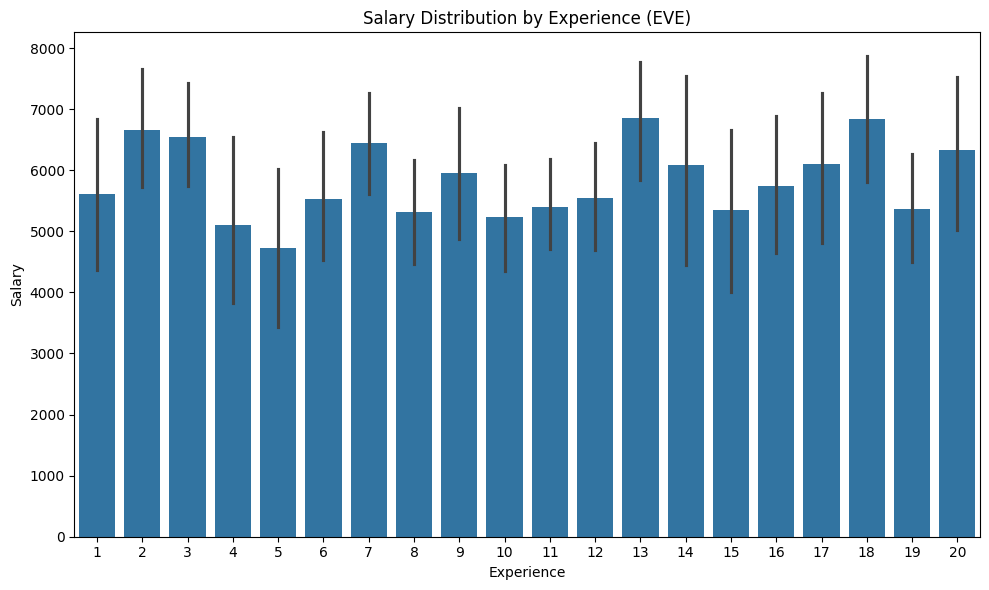

In [11]:
eve_pl = data1.filter(data1["Session"] == "Evening")
eve_pl.show()
eve_pl_pd = eve_pl.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=eve_pl_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (EVE)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|
| 11|       Nicole Bell| 42|Female|     Sales|  5336|  2015-01-28|              3.0|         7|  Active|Los Angeles|Evening|
| 15|Matthew Collins MD| 31|Female|     Sales|  8568|  2020-06-01|              2.0|        20|Inactive|Los Angeles|Evening|
| 33|     Trevor Duncan| 65| Other|     Sales|  6547|  2024-06-10|              2.0|        10|  Active|    Chicago|Evening|
| 37|  Jacqueline Moore| 39|  Male|     Sales|  2364|  2018-02-25|              1.0|        15|  Active|Los Angeles|Evening|


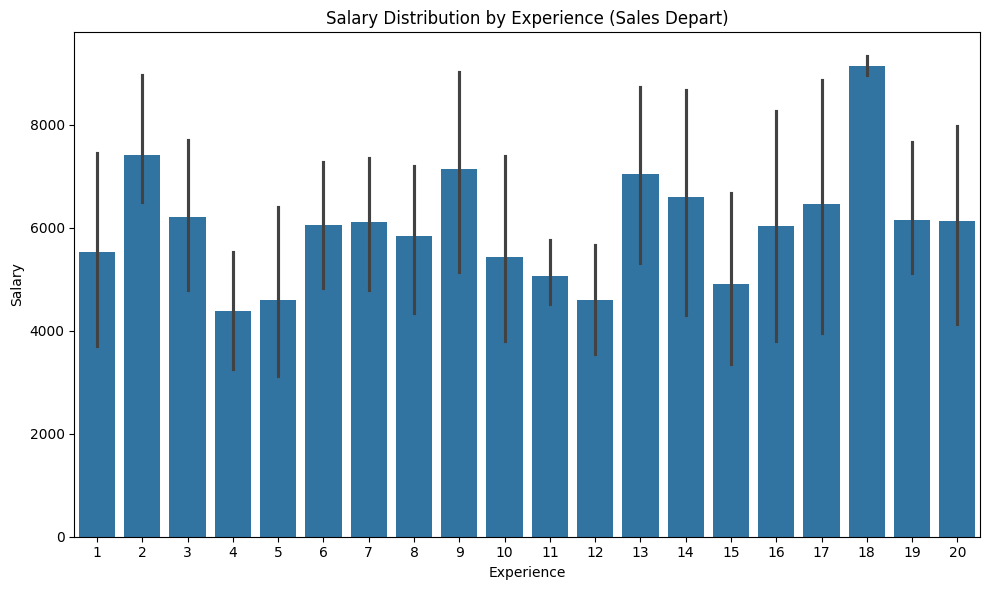

In [12]:
eve_pl_sales = eve_pl.filter(eve_pl["Department"] == "Sales")
eve_pl_sales.show()
eve_pl_sales_pd = eve_pl_sales.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=eve_pl_sales_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (Sales Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+---------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|           Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+---------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  6|    Ashley Howe| 29|Female|        HR|  2591|  2016-06-24|              1.0|         6|  Active|    Chicago|Evening|
|  8|   Amanda Baker| 52| Other|        HR|  6285|  2015-04-01|              2.0|         8|Inactive|    Chicago|Evening|
| 17| Jonathan Perez| 59|  Male|        HR|  6586|  2019-02-19|              3.0|         7|Inactive|Los Angeles|Evening|
| 20|   Victoria Fox| 57|Female|        HR|  7251|  2023-06-07|              2.0|        10|  Active|Los Angeles|Evening|
| 24|Marissa Stewart| 31|Female|        HR|  5386|  2021-01-30|              2.0|         3|  Active|Los Angeles|Evening|
| 26| Tara Blackwell| 30

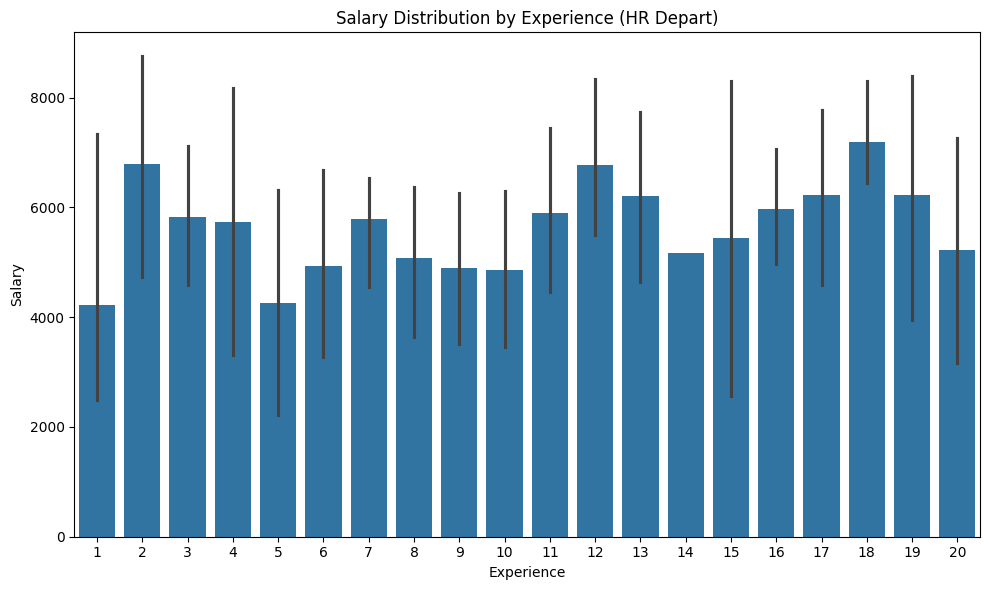

In [13]:
eve_pl_HR = eve_pl.filter(eve_pl["Department"] == "HR")
eve_pl_HR.show()
eve_pl_HR_pd = eve_pl_HR.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=eve_pl_HR_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (HR Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|
|  5|      Amber Harris| 35| Other|        IT|  4317|  2020-02-15|              5.0|        16|Inactive|   New York|Evening|
| 36|       Kevin Watts| 35|  Male|        IT|  9078|  2019-06-12|              1.0|         7|Inactive|Los Angeles|Evening|
| 64|   Katherine Clark| 39|Female|        IT|  2585|  2023-02-17|              2.0|         1|  Active|Los Angeles|Evening|
| 80|        Mary Singh| 39| Other|        IT|  5562|  2019-07-06|              2.0|         7|Inactive|   New York|Evening|


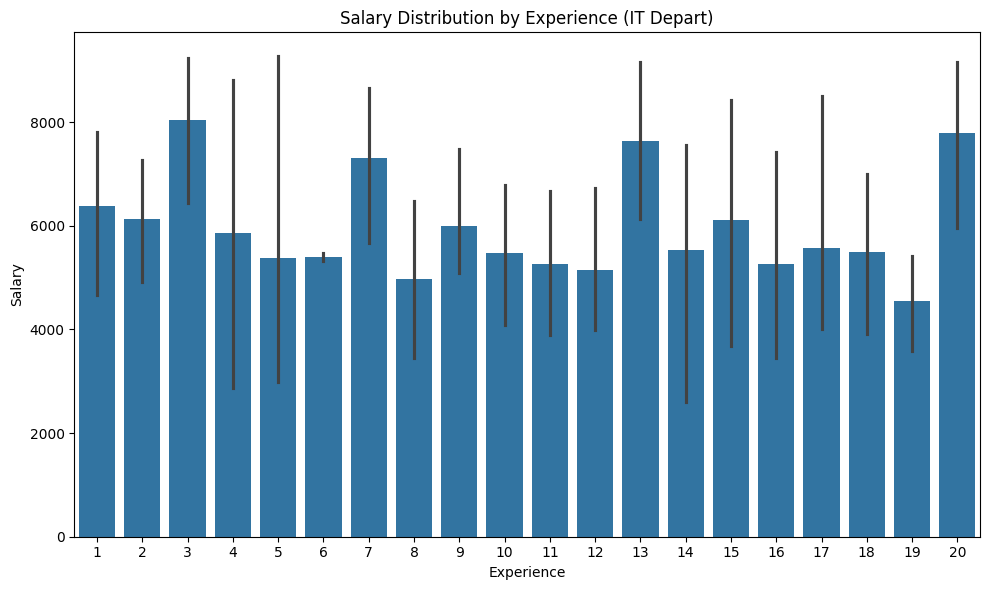

In [14]:
eve_pl_IT = eve_pl.filter(eve_pl["Department"] == "IT")
eve_pl_IT.show()
eve_pl_IT_pd = eve_pl_IT.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=eve_pl_IT_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (IT Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|                Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  1|        Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|
|  7|         David Olson| 39|Female|     Sales|  6826|  2023-05-11|              2.0|         4|  Active|   New York|  Night|
|  9|       Jeremy Wright| 63|Female|     Sales|  9862|  2024-02-07|              2.0|         3|Inactive|   New York|  Night|
| 12|   Rodney Richardson| 60| Other|        HR|  6908|  2015-03-14|              4.0|        19|  Active|    Chicago|  Night|
| 13|     Joshua Robinson| 61|  Male|        IT|  5688|  2020-06-21|              2.0|         4|Inactive|    C

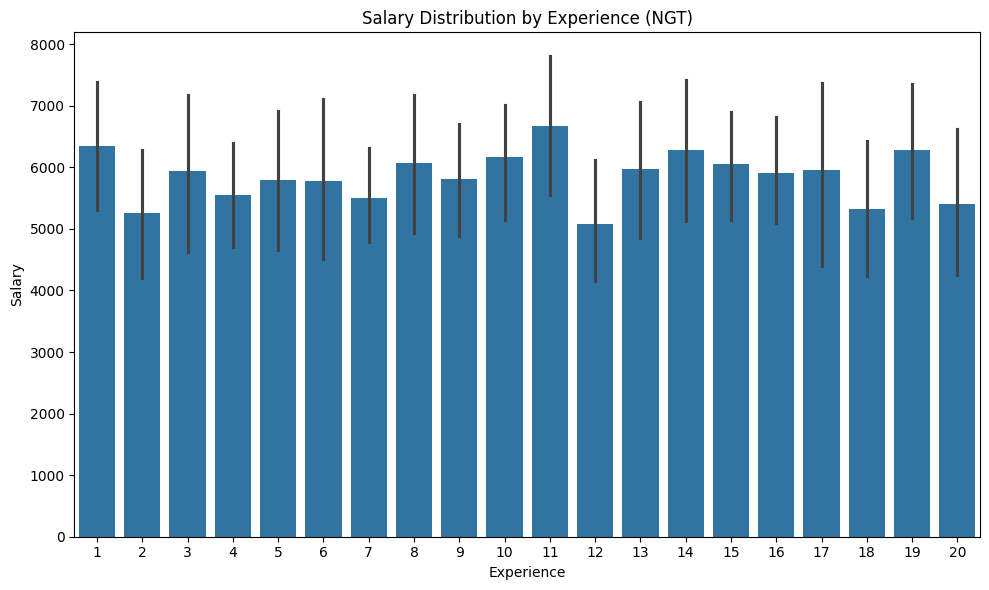

In [15]:
ngt_pl = data1.filter(data1['Session'] == "Night")
ngt_pl.show()
ngt_pl_pd = ngt_pl.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=ngt_pl_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (NGT)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+----------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|            Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+----------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  7|     David Olson| 39|Female|     Sales|  6826|  2023-05-11|              2.0|         4|  Active|   New York|  Night|
|  9|   Jeremy Wright| 63|Female|     Sales|  9862|  2024-02-07|              2.0|         3|Inactive|   New York|  Night|
| 21|   Heather Jones| 35|  Male|     Sales|  4565|  2018-02-07|              2.0|         9|  Active|    Chicago|  Night|
| 23|    Bryce Carter| 35|Female|     Sales|  9598|  2015-12-16|              4.0|         4|Inactive|   New York|  Night|
| 30|   Rachel Ramsey| 22|  Male|     Sales|  9661|  2016-08-18|              2.0|        17|Inactive|    Chicago|  Night|
| 54|  Taylor Gr

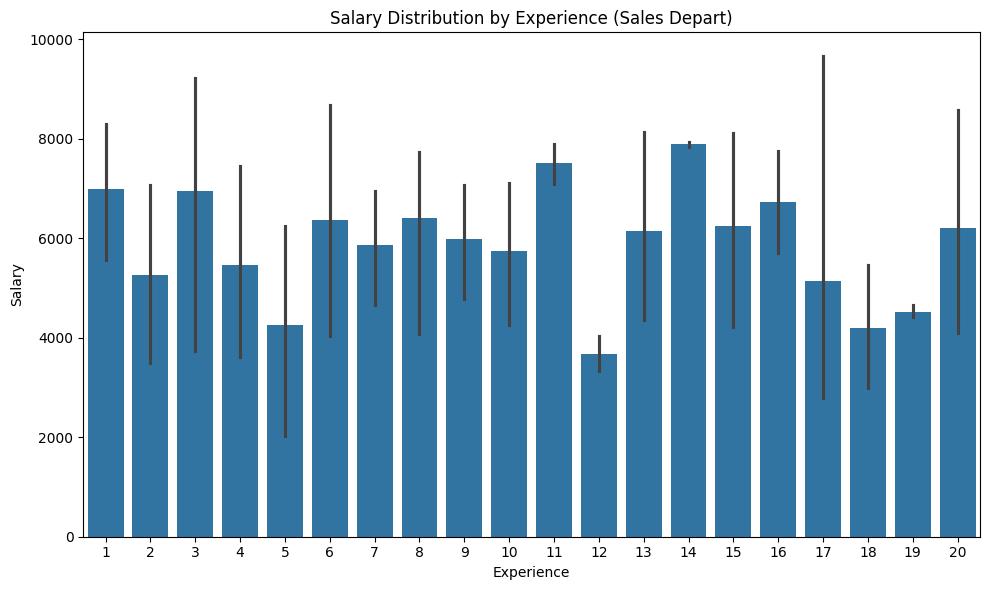

In [16]:
ngt_pl_sales = ngt_pl.filter(ngt_pl["Department"] == "Sales")
ngt_pl_sales.show()
ngt_pl_sales_pd = ngt_pl_sales.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=ngt_pl_sales_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (Sales Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|                Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
|  1|        Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|
| 12|   Rodney Richardson| 60| Other|        HR|  6908|  2015-03-14|              4.0|        19|  Active|    Chicago|  Night|
| 19|      Nancy Stephens| 38|  Male|        HR|  9061|  2017-07-16|              5.0|        16|Inactive|    Chicago|  Night|
| 22|       Stacie Porter| 61|Female|        HR|  4071|  2020-05-04|              2.0|         9|Inactive|    Chicago|  Night|
| 38|       Lawrence Rose| 18|Female|        HR|  2904|  2021-04-11|              1.0|        17|Inactive|    C

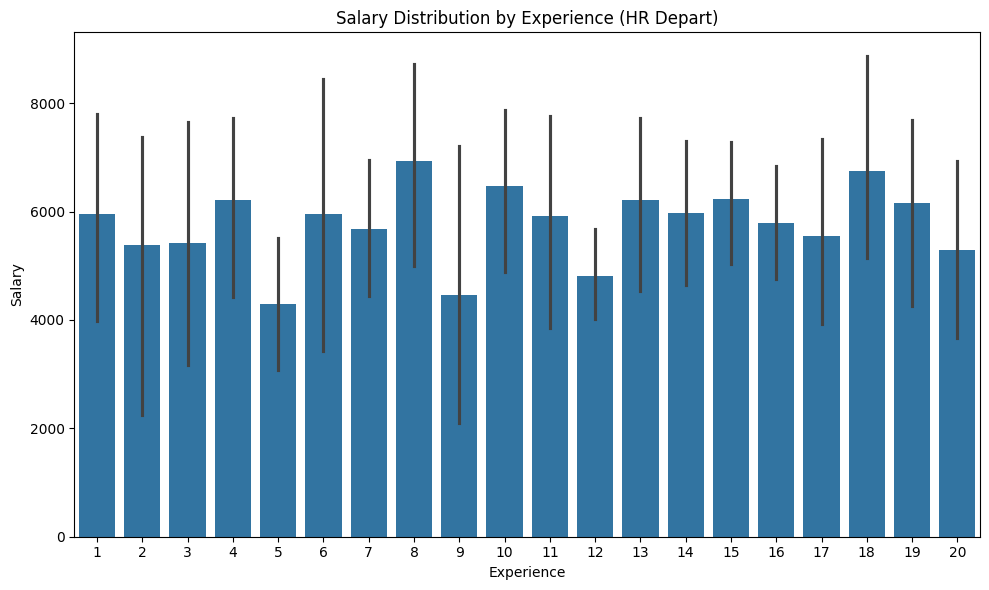

In [17]:
ngt_pl_HR = ngt_pl.filter(ngt_pl["Department"] == "HR")
ngt_pl_HR.show()
ngt_pl_HR_pd = ngt_pl_HR.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=ngt_pl_HR_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (HR Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| ID|               Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|
+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+
| 13|    Joshua Robinson| 61|  Male|        IT|  5688|  2020-06-21|              2.0|         4|Inactive|    Chicago|  Night|
| 14|  Benjamin Callahan| 34|  Male|        IT|  5593|  2019-06-23|              2.0|         2|Inactive|Los Angeles|  Night|
| 27|        Austin Long| 20|Female|        IT|  4899|  2024-05-01|              5.0|         8|Inactive|    Chicago|  Night|
| 31|       Brandi Smith| 21| Other|        IT|  4780|  2020-01-20|              1.0|         7|Inactive|   New York|  Night|
| 34|   Mr. Brian Nelson| 42|Female|        IT|  5207|  2017-08-17|              1.0|         4|  Active|Los Angeles| 

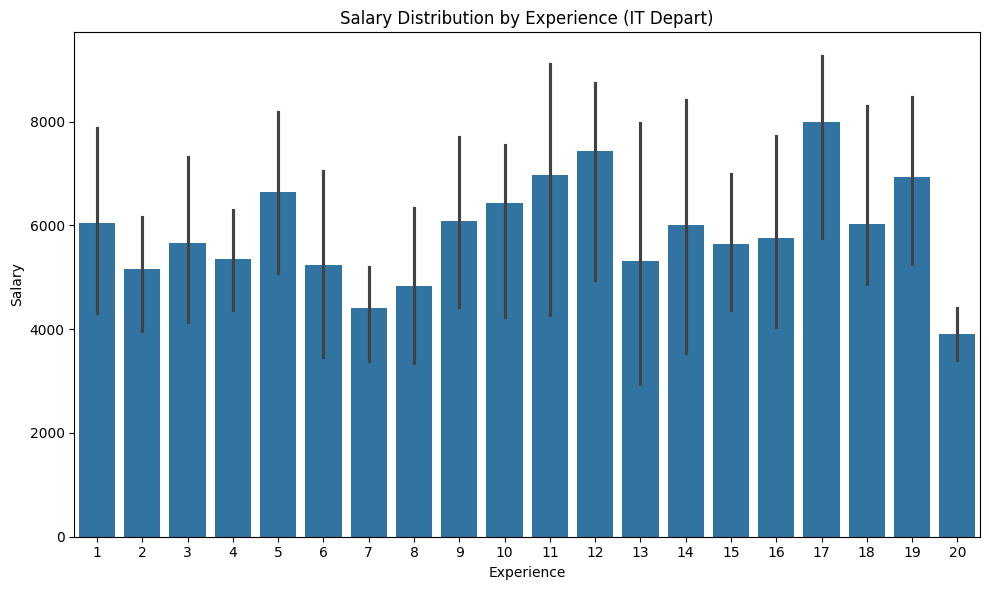

In [18]:
ngt_pl_IT = ngt_pl.filter(ngt_pl["Department"] == "IT")
ngt_pl_IT.show()
ngt_pl_IT_pd = ngt_pl_IT.select("Salary", "Experience").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=ngt_pl_IT_pd, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience (IT Depart)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [19]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("PySpark_Tutorial").getOrCreate())

from pyspark.ml.feature import VectorAssembler
input_col = ["Salary", "Experience"]
assembler = VectorAssembler(inputCols= input_col, outputCol = "feature")
data_with_vector = assembler.transform(data1)
data_with_vector.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|      feature|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------------+
|  1|      Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|[5641.0,16.0]|
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|[4249.0,11.0]|
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning| [3058.0,1.0]|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|[5895.0,13.0]|
|  5|      Amber Harris| 35

In [20]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
indexer_model = indexer.fit(data1)
data_indexed = indexer_model.transform(data1)
data_indexed.show()

+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-----------+
| ID|              Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|GenderIndex|
+---+------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-----------+
|  1|      Cory Escobar| 48|Female|        HR|  5641|  2015-05-03|              2.0|        16|  Active|   New York|  Night|        1.0|
|  2|   Timothy Sanchez| 25| Other|     Sales|  4249|  2020-11-09|              2.0|        11|Inactive|Los Angeles|Evening|        0.0|
|  3|      Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|        0.0|
|  4|Christine Williams| 58|Female|        IT|  5895|  2017-09-08|              2.0|        13|Inactive|Los Angeles|Evening|        1.0|
|  5|      Amber Harris| 35| Other|      

# **PREDICTING THE SALARY OF A PERSON IN MORNING SESSION IN SALES DEPARTMENT**

# Task
Apply linear regression on "mrng_pl_sales" and predict the salary based on the columns "Salary" and "Experience". Add two inputs where the user gives the years of experience and session as inputs, and the model should predict the salary.

## Prepare data

### Subtask:
Select the "Salary" and "Experience" columns from the `mrng_pl_sales` DataFrame and convert it to a feature vector.


**Reasoning**:
Select the specified columns from `mrng_pl_sales` and transform them into a feature vector for linear regression.



In [21]:
from pyspark.ml.feature import VectorAssembler

# Correctly define the assembler to use 'Experience' as the feature
input_col = ["Experience"]
assembler = VectorAssembler(inputCols= input_col, outputCol = "feature")
mrng_pl_sales_with_vector = assembler.transform(mrng_pl_sales)
mrng_pl_sales_with_vector.show()

+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------+
| ID|                Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|feature|
+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------+
|  3|        Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|  [1.0]|
| 32|   Jacqueline Becker| 63| Other|     Sales|  4270|  2021-12-16|              2.0|        20|Inactive|Los Angeles|Morning| [20.0]|
| 49|          Jamie Wood| 46|  Male|     Sales|  2773|  2023-02-25|              4.0|         9|  Active|   New York|Morning|  [9.0]|
| 51|       Jamie Gregory| 27| Other|     Sales|  3253|  2015-12-07|              2.0|        12|  Active|    Chicago|Morning| [12.0]|
| 53|       Steve Salinas| 42| Other|     Sales|  6567|

## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using an 80/20 ratio.



In [22]:
training_data, testing_data = mrng_pl_sales_with_vector.randomSplit([0.8, 0.2], seed=42)
training_data.show()
testing_data.show()

+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------+
| ID|                Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|feature|
+---+--------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------+
|  3|        Chad Nichols| 57| Other|     Sales|  3058|  2019-02-12|              2.0|         1|Inactive|   New York|Morning|  [1.0]|
| 32|   Jacqueline Becker| 63| Other|     Sales|  4270|  2021-12-16|              2.0|        20|Inactive|Los Angeles|Morning| [20.0]|
| 51|       Jamie Gregory| 27| Other|     Sales|  3253|  2015-12-07|              2.0|        12|  Active|    Chicago|Morning| [12.0]|
| 53|       Steve Salinas| 42| Other|     Sales|  6567|  2022-03-26|              2.0|        19|Inactive|Los Angeles|Morning| [19.0]|
| 62|       Carmen Taylor| 33|  Male|     Sales|  2851|

## Train model

### Subtask:
Train a Linear Regression model using the training data.


**Reasoning**:
Train a Linear Regression model using the training data.



In [23]:
from pyspark.ml.regression import LinearRegression

# Train the model with 'Experience' as the feature and 'Salary' as the label
lr = LinearRegression(featuresCol = "feature", labelCol = "Salary")
lr_model = lr.fit(training_data)

## Evaluate model

### Subtask:
Evaluate the model's performance on the testing data.


**Reasoning**:
Evaluate the trained Linear Regression model on the testing data using RMSE.



In [24]:
from pyspark.ml.evaluation import RegressionEvaluator
predictions = lr_model.transform(testing_data)
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on testing data = {}".format(rmse))

Root Mean Squared Error (RMSE) on testing data = 2350.211404077631


## Predict salary for custom inputs

### Subtask:
Generate code to take user inputs for experience and session, and then predict the salary using the trained model.


**Reasoning**:
Define a function to predict salary based on experience and session, create a Spark DataFrame with the input, transform it using the assembler, and use the trained linear regression model to get the prediction. Then, prompt the user for input and call the function to get the prediction.



In [25]:
def predict_salary(experience_years, session):
    """Predicts salary based on experience and session (for Morning Sales).

    Args:
        experience_years: Years of experience.
        session: The session ('Morning', 'Evening', 'Night').

    Returns:
        The predicted salary for the Morning Sales department.
    """
    # Create a DataFrame for prediction with the correct structure.
    # The model is trained on "mrng_pl_sales" with 'Experience' as the feature.
    # The session is not used in this specific linear regression model,
    # but the function signature includes it as per instruction.
    input_data = spark.createDataFrame([(experience_years,)], ["Experience"])

    # Use the assembler (which now correctly uses 'Experience' as the input feature)
    # to transform the input data into a feature vector.
    input_vector = assembler.transform(input_data)

    # Make prediction using the retrained model
    predicted_df = lr_model.transform(input_vector)

    # Extract the predicted salary
    predicted_salary = predicted_df.select("prediction").collect()[0][0]

    return predicted_salary

# Prompt user for input
user_experience = int(input("Enter years of experience: "))
user_session = input("Enter session (Morning, Evening, Night): ") # Although not used by this model, still taking input as per instruction

# Get prediction
predicted_salary_value = predict_salary(user_experience, user_session)

# Display the prediction
print(f"Predicted salary for {user_experience} years of experience in {user_session} session (Morning Sales Department): {predicted_salary_value}")

Enter years of experience: 10
Enter session (Morning, Evening, Night): Morning
Predicted salary for 10 years of experience in Morning session (Morning Sales Department): 5699.773721610702


In [27]:
# Re-run the evaluation metrics
from pyspark.ml.evaluation import RegressionEvaluator

predictions = lr_model.transform(testing_data)

# Evaluate using RMSE
evaluator_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on testing data = {}".format(rmse))

# Evaluate using MAE
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print("Mean Absolute Error (MAE) on testing data = {}".format(mae))

# Evaluate using R-squared
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on testing data = {}".format(r2))

Root Mean Squared Error (RMSE) on testing data = 2350.211404077631
Mean Absolute Error (MAE) on testing data = 2028.9881411298443
R-squared (R2) on testing data = -0.029774312114053014


In [28]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate using MAE
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print("Mean Absolute Error (MAE) on testing data = {}".format(mae))

# Evaluate using R-squared
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on testing data = {}".format(r2))

Mean Absolute Error (MAE) on testing data = 2028.9881411298443
R-squared (R2) on testing data = -0.029774312114053014


# Task
Apply linear regression on `mrng_pl_HR` and predict the salary based on the columns `Salary` and `Experience`. Check the `mrng_pl_HR_pd` for better results and add two inputs where the user gives the years of experience and session as inputs and the model should predict the salary.

## Prepare data

### Subtask:
Select the "Salary" and "Experience" columns from the `mrng_pl_HR` DataFrame and convert it to a feature vector.


**Reasoning**:
Select the specified columns from `mrng_pl_HR` and transform them into a feature vector for linear regression.



In [29]:
from pyspark.ml.feature import VectorAssembler

input_col = ["Experience"]
assembler = VectorAssembler(inputCols= input_col, outputCol = "feature")
mrng_pl_HR_with_vector = assembler.transform(mrng_pl_HR)
mrng_pl_HR_with_vector.show()

+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------+
| ID|               Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|feature|
+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------+
| 16|        Gary Cooley| 62|  Male|        HR|  5386|  2017-07-25|              2.0|         2|Inactive|    Chicago|Morning|  [2.0]|
| 18| Jacqueline Randall| 31|Female|        HR|  3519|  2018-05-18|              4.0|         6|  Active|   New York|Morning|  [6.0]|
| 25|      Tracy Carlson| 21|  Male|        HR|  9275|  2022-04-09|              4.0|        12|  Active|   New York|Morning| [12.0]|
| 28|      Jordan Warren| 55|Female|        HR|  4608|  2018-07-07|              2.0|        18|Inactive|Los Angeles|Morning| [18.0]|
| 47|       Alicia Scott| 47|Female|        HR|  7966|  2019-0

## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using an 80/20 ratio.



In [30]:
training_data_hr, testing_data_hr = mrng_pl_HR_with_vector.randomSplit([0.8, 0.2], seed=42)
training_data_hr.show()
testing_data_hr.show()

+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------+
| ID|               Name|Age|Gender|Department|Salary|Joining Date|Performance Score|Experience|  Status|   Location|Session|feature|
+---+-------------------+---+------+----------+------+------------+-----------------+----------+--------+-----------+-------+-------+
| 16|        Gary Cooley| 62|  Male|        HR|  5386|  2017-07-25|              2.0|         2|Inactive|    Chicago|Morning|  [2.0]|
| 18| Jacqueline Randall| 31|Female|        HR|  3519|  2018-05-18|              4.0|         6|  Active|   New York|Morning|  [6.0]|
| 28|      Jordan Warren| 55|Female|        HR|  4608|  2018-07-07|              2.0|        18|Inactive|Los Angeles|Morning| [18.0]|
| 47|       Alicia Scott| 47|Female|        HR|  7966|  2019-09-03|              2.0|         8|Inactive|   New York|Morning|  [8.0]|
| 73|    Jennifer Carter| 52|  Male|        HR|  8386|  2016-0

## Train model

### Subtask:
Train a Linear Regression model using the training data.


**Reasoning**:
Train a Linear Regression model using the training data.



In [31]:
from pyspark.ml.regression import LinearRegression

lr_hr = LinearRegression(featuresCol = "feature", labelCol = "Salary")
lr_model_hr = lr_hr.fit(training_data_hr)

## Evaluate model

### Subtask:
Evaluate the model's performance on the testing data using appropriate regression metrics.


**Reasoning**:
Evaluate the trained Linear Regression model on the testing data using RMSE, MAE, and R-squared metrics.



In [32]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions_hr = lr_model_hr.transform(testing_data_hr)

evaluator_rmse_hr = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="rmse")
rmse_hr = evaluator_rmse_hr.evaluate(predictions_hr)
print("Root Mean Squared Error (RMSE) on testing data = {}".format(rmse_hr))

evaluator_mae_hr = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="mae")
mae_hr = evaluator_mae_hr.evaluate(predictions_hr)
print("Mean Absolute Error (MAE) on testing data = {}".format(mae_hr))

evaluator_r2_hr = RegressionEvaluator(predictionCol="prediction", labelCol="Salary", metricName="r2")
r2_hr = evaluator_r2_hr.evaluate(predictions_hr)
print("R-squared (R2) on testing data = {}".format(r2_hr))

Root Mean Squared Error (RMSE) on testing data = 3003.336655991982
Mean Absolute Error (MAE) on testing data = 2724.1161860754128
R-squared (R2) on testing data = -0.24340712463358471


In [33]:
def predict_salary_hr(experience_years, session):
    """Predicts salary based on experience and session (for Morning HR).

    Args:
        experience_years: Years of experience.
        session: The session ('Morning', 'Evening', 'Night').

    Returns:
        The predicted salary for the Morning HR department.
    """
    # Create a DataFrame for prediction with the correct structure.
    # The model is trained on "mrng_pl_HR" with 'Experience' as the feature.
    # The session is not used in this specific linear regression model,
    # but the function signature includes it as per instruction.
    input_data_hr = spark.createDataFrame([(experience_years,)], ["Experience"])

    # Use the assembler (which now correctly uses 'Experience' as the input feature)
    # to transform the input data into a feature vector.
    input_vector_hr = assembler.transform(input_data_hr)

    # Make prediction using the trained model for HR
    predicted_df_hr = lr_model_hr.transform(input_vector_hr)

    # Extract the predicted salary
    predicted_salary_hr_value = predicted_df_hr.select("prediction").collect()[0][0]

    return predicted_salary_hr_value

# Prompt user for input
user_experience_hr = int(input("Enter years of experience for Morning HR: "))
user_session_hr = input("Enter session (Morning, Evening, Night): ") # Although not used by this model, still taking input as per instruction

# Get prediction
predicted_salary_hr_value = predict_salary_hr(user_experience_hr, user_session_hr)

# Display the prediction
print(f"Predicted salary for {user_experience_hr} years of experience in {user_session_hr} session (Morning HR Department): {predicted_salary_hr_value}")

Enter years of experience for Morning HR: 10
Enter session (Morning, Evening, Night): Morning
Predicted salary for 10 years of experience in Morning session (Morning HR Department): 6488.474182928763
